# Introduction

This notebook aimed to find the best machine learning model for classifying whether or not a patient has cardiovascular disease.

The dataset provided through Kaggle (https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset/data) was used to develop the models. In addition to the dataset, you can also find a .pdf file that explains very well each feature present in the dataset and the variables that we can find in them.

# Data Analysis

First, we'll import the necessary libraries to be able to perform data analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
DF_CD = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

# Data Information and Preview

In [3]:
DF_CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


This dataset consists of 1000 entries of 14 features and has no empty cell.

We can also see some examples of variables that we can come across in this dataset.

In [4]:
DF_CD.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


# Exploratory Data Analysis (EDA)

Analyzing correlations between features in a DataFrame is a crucial step in developing machine learning models because we can avoid overfitting when we observe a high correlation between features.

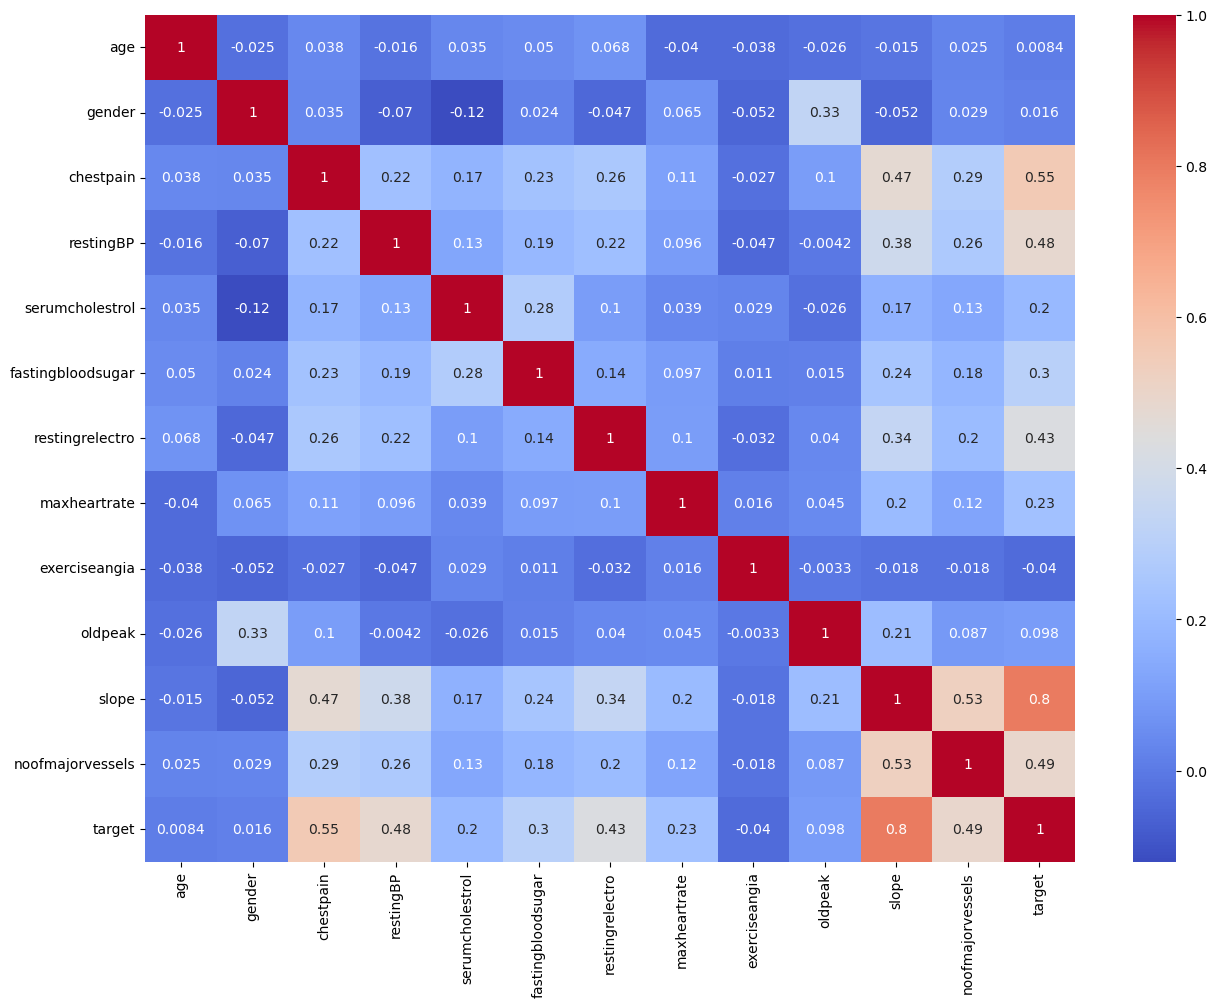

In [5]:
correlation_matrix = DF_CD.drop(['patientid'], axis=1).corr()

plt.figure(figsize = (15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

When the $\textbf{target}$ is observed, we are able to conclude that $\textbf{slope}$ has a strong degree of correlation. Others that have a moderate degree of correlation are $\textbf{chestpain}$, $\textbf{noofmajorvessels}$, $\textbf{restingBP}$ and $\textbf{restingrelectro}$. Except for restingBP, all are features of ordinal variables.

Furthermore, it was found that no independent variable has a high correlation with each other.

By exclusively analyzing these ordinal variables, we can better understand why they are correlated with cardiovascular diseases (CD). Therefore, graphs were created of the total number of people and the CD rate by the types of each feature.

In [6]:
Slope = DF_CD.groupby('slope')['target'].agg(['sum', 'count', 'mean']).reset_index()
ChestPain = DF_CD.groupby('chestpain')['target'].agg(['sum', 'count', 'mean']).reset_index()
NoOfMajorVessels = DF_CD.groupby('noofmajorvessels')['target'].agg(['sum', 'count', 'mean']).reset_index()
RestingrElectro = DF_CD.groupby('restingrelectro')['target'].agg(['sum', 'count', 'mean']).reset_index()

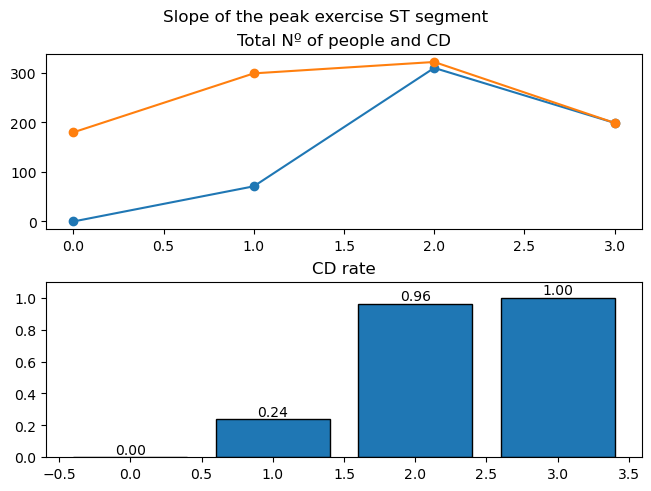

In [7]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, constrained_layout=True)

ax[0].plot(Slope['slope'], Slope['sum'], marker ='o')
ax[0].plot(Slope['slope'], Slope['count'], marker ='o')
ax[0].set_title('Total Nº of people and CD')

labels = ax[1].bar(Slope['slope'], Slope['mean'], edgecolor='black')
ax[1].bar_label(labels, fmt="%.02f")
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('CD rate')

fig.suptitle('Slope of the peak exercise ST segment')
plt.show()

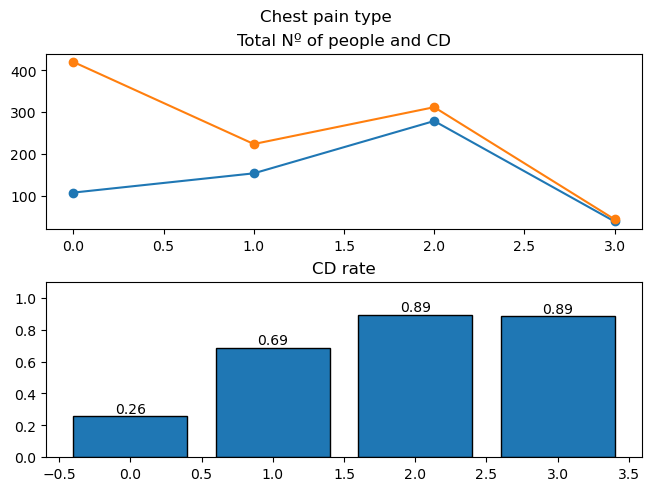

In [8]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, constrained_layout=True)

ax[0].plot(ChestPain['chestpain'], ChestPain['sum'], marker ='o')
ax[0].plot(ChestPain['chestpain'], ChestPain['count'], marker ='o')
ax[0].set_title('Total Nº of people and CD')

labels = ax[1].bar(ChestPain['chestpain'], ChestPain['mean'], edgecolor='black')
ax[1].bar_label(labels, fmt="%.02f")
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('CD rate')

fig.suptitle('Chest pain type')
plt.show()

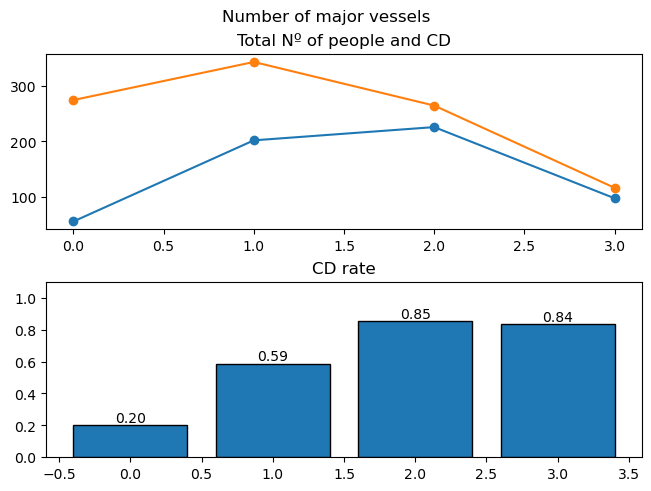

In [9]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, constrained_layout=True)

ax[0].plot(NoOfMajorVessels['noofmajorvessels'], NoOfMajorVessels['sum'], marker ='o')
ax[0].plot(NoOfMajorVessels['noofmajorvessels'], NoOfMajorVessels['count'], marker ='o')
ax[0].set_title('Total Nº of people and CD')

labels = ax[1].bar(NoOfMajorVessels['noofmajorvessels'], NoOfMajorVessels['mean'], edgecolor='black')
ax[1].bar_label(labels, fmt="%.02f")
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('CD rate')

fig.suptitle('Number of major vessels')
plt.show()

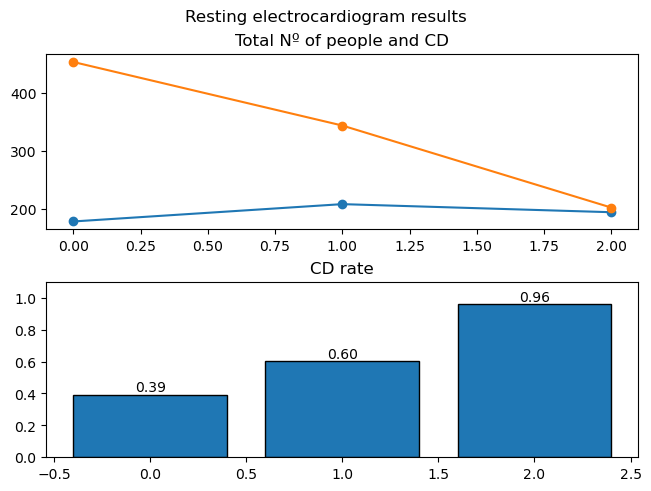

In [10]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, constrained_layout=True)

ax[0].plot(RestingrElectro['restingrelectro'], RestingrElectro['sum'], marker ='o')
ax[0].plot(RestingrElectro['restingrelectro'], RestingrElectro['count'], marker ='o')
ax[0].set_title('Total Nº of people and CD')

labels = ax[1].bar(RestingrElectro['restingrelectro'], RestingrElectro['mean'], edgecolor='black')
ax[1].bar_label(labels, fmt="%.02f")
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('CD rate')

fig.suptitle('Resting electrocardiogram results')
plt.show()

# Development of Machine Learning Models

The machine learning models tested were the usual ones for classification: Logistic regression, random forest classifier, K nighbors classifier, suport vector classifier and naive bayes.

Before submitting to the models, we separate the independent and dependent variables.

In [11]:
X = DF_CD.drop(['target', 'patientid'], axis = 1)
y = DF_CD['target']

Now we split the training and testing data.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
import warnings
warnings.filterwarnings('ignore')

By applying the independent and dependent training variables to each model, we collect the target prediction values using the independent test variables.

In [14]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42) #Logistic Regression Model
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
clf_knc = KNeighborsClassifier(n_neighbors=2) #K Neighbors Classifier Model
clf_knc.fit(X_train, y_train)
y_pred_knc = clf_knc.predict(X_test)

from sklearn.svm import SVC
clf_svc = SVC(random_state = 42) #Suport Vector Classifier Model
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

from sklearn.naive_bayes import GaussianNB #Naive Bayes Model
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)

from sklearn.ensemble import RandomForestClassifier #Random Forest CLassifier Model
clf_ac = RandomForestClassifier(max_depth=2, random_state=42)
clf_ac.fit(X_train, y_train)
y_pred_ac = clf_ac.predict(X_test)

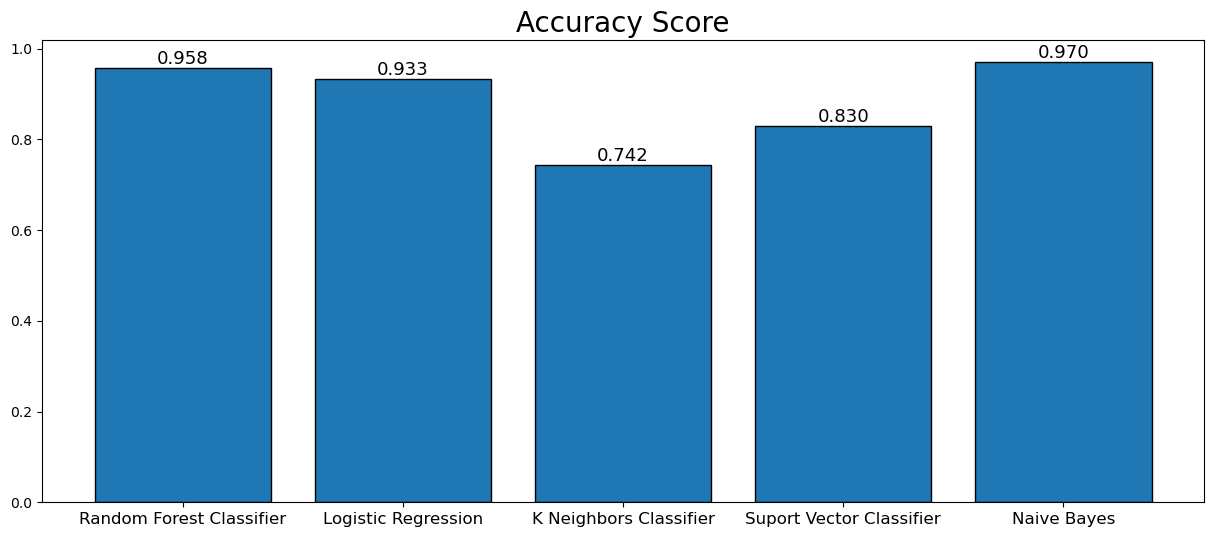

In [15]:
from sklearn.metrics import accuracy_score

Model = ['Random Forest Classifier', 'Logistic Regression', 'K Neighbors Classifier', 'Suport Vector Classifier', 'Naive Bayes']
Accuracy_Score1 = []

Accuracy_Score1.append(accuracy_score(y_test, y_pred_ac))
Accuracy_Score1.append(accuracy_score(y_test, y_pred_lr))
Accuracy_Score1.append(accuracy_score(y_test, y_pred_knc))
Accuracy_Score1.append(accuracy_score(y_test, y_pred_svc))
Accuracy_Score1.append(accuracy_score(y_test, y_pred_gnb))

fig, ax = plt.subplots(figsize = (15, 6))

labels = ax.bar(Model, Accuracy_Score1, edgecolor='black')
ax.bar_label(labels, fmt="%.03f", color='black', fontsize = 13)
ax.set_xticklabels(labels = Model, fontsize=12)
ax.set_title('Accuracy Score', fontsize = 20)

plt.show()

The Random Forest, Logistic Regression and Naive Bayes Model presented excellent results, while K Neighbors and Suport Vector did'nt perform as well. This disparity can be caused mainly by the difference in scales of the feature variables, as can be seen in the box plot.

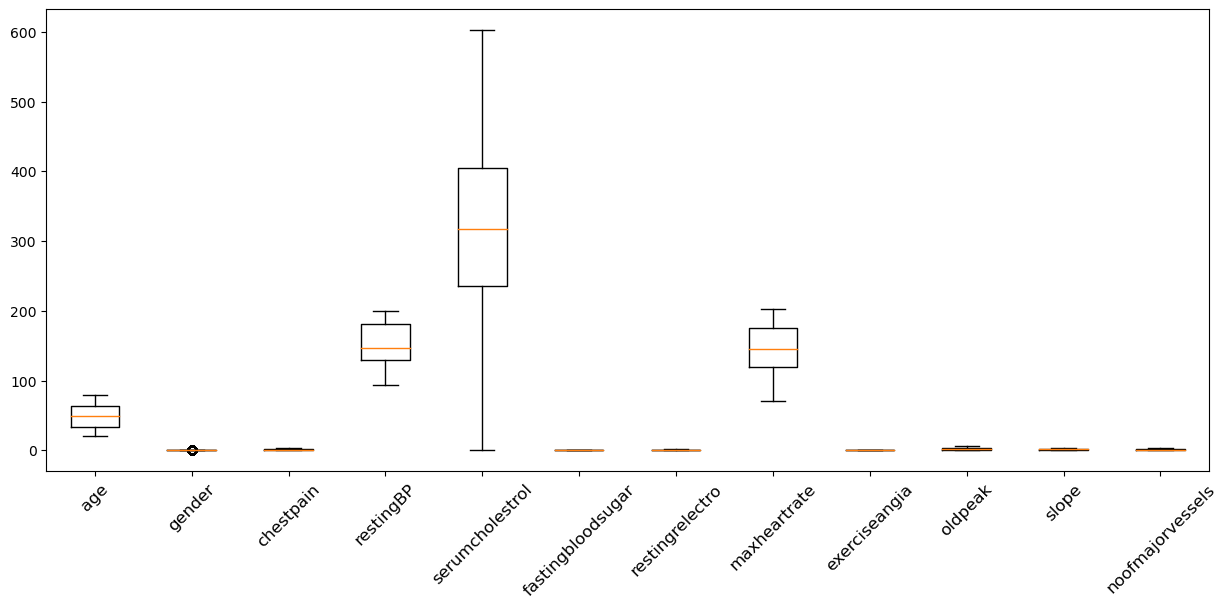

In [16]:
fig, ax = plt.subplots(figsize = (15, 6))

ax.boxplot(DF_CD.iloc[:, 1:13])
ax.set_xticks(range(1, DF_CD.iloc[:, 1:13].shape[1]+1), DF_CD.iloc[:, 1:13].columns, rotation =45, fontsize=12)

plt.show()

As a second step, we will standardize the input data of our models in order to improve.

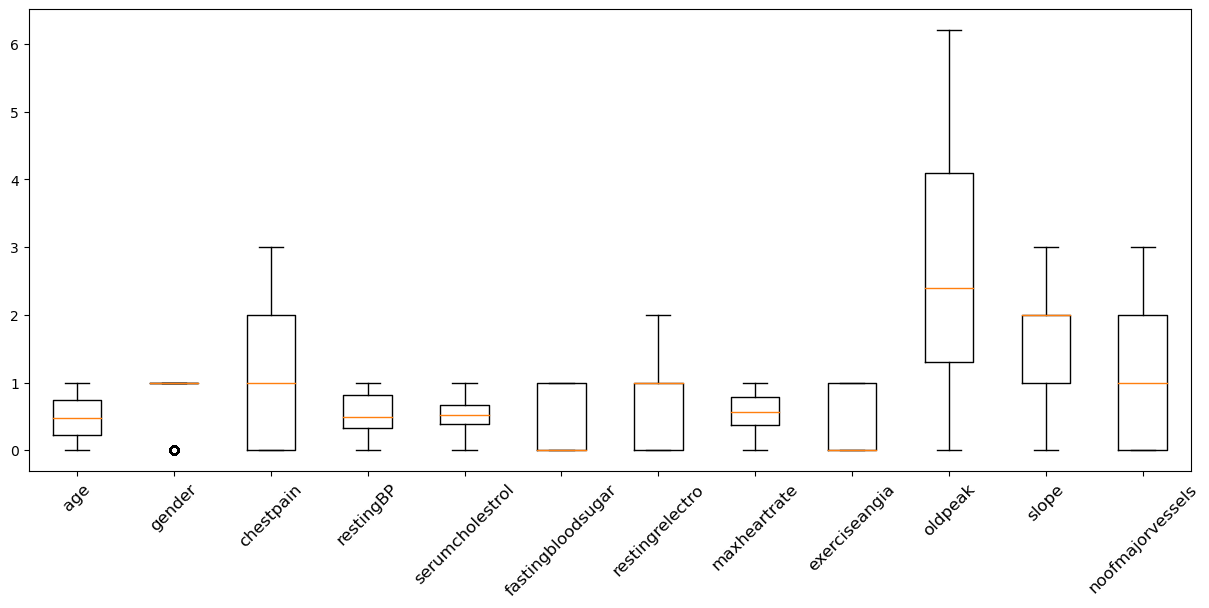

In [17]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(DF_CD[['age', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'maxheartrate']])
DF_CD[['age', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'maxheartrate']] = transformer.transform(DF_CD[['age', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'maxheartrate']])

fig, ax = plt.subplots(figsize = (15, 6))

ax.boxplot(DF_CD.iloc[:, 1:13])
ax.set_xticks(range(1, DF_CD.iloc[:, 1:13].shape[1]+1), DF_CD.iloc[:, 1:13].columns, rotation =45, fontsize=12)

plt.show()

In [18]:
X = DF_CD.drop(['target', 'patientid'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

clf_ac.fit(X_train, y_train)
y_pred_ac = clf_ac.predict(X_test)

clf_knc.fit(X_train, y_train)
y_pred_knc = clf_knc.predict(X_test)

clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)

Accuracy_Score2 = []

Accuracy_Score2.append(accuracy_score(y_test, y_pred_ac))
Accuracy_Score2.append(accuracy_score(y_test, y_pred_lr))
Accuracy_Score2.append(accuracy_score(y_test, y_pred_knc))
Accuracy_Score2.append(accuracy_score(y_test, y_pred_svc))
Accuracy_Score2.append(accuracy_score(y_test, y_pred_gnb))

AS_Model = pd.DataFrame(np.array([Accuracy_Score1, Accuracy_Score2]))
AS_Model.columns = Model
AS_Model['Stage'] = pd.DataFrame(np.array([['Stage 1'], ['Stage 2']]))

With standardization, an increase in the accuracy of models that did not perform so well previously can be seen, in addition to logistic regression that had previously performed well. This happen because these models are extremely sensitive to scale of the features.

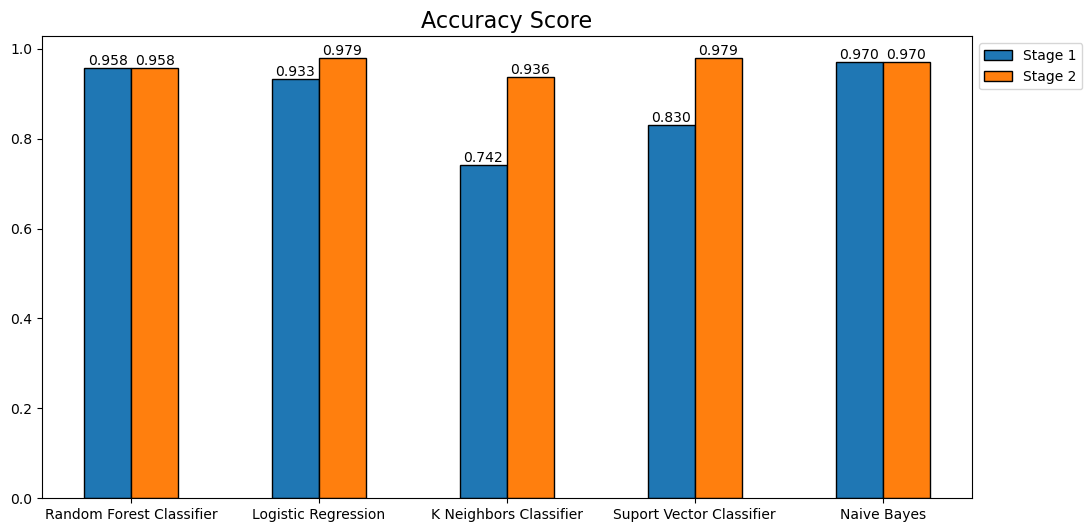

In [19]:
x = np.arange(5)

plt.figure(figsize=(12, 6))

barWidth = 0.25
bars1 = np.arange(5)
bars2 = [bar + barWidth for bar in bars1]

b1 = plt.bar(bars1, AS_Model.iloc[0,:5], width=barWidth, label=AS_Model.Stage[0], edgecolor='black')
b2 = plt.bar(bars2, AS_Model.iloc[1,:5], width=barWidth, label=AS_Model.Stage[1], edgecolor='black')

plt.bar_label(b1, fmt="%.03f", color='black', fontsize = 10)
plt.bar_label(b2, fmt="%.03f", color='black', fontsize = 10)
plt.title('Accuracy Score', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks = (bars1+bars2)/2,labels = Model, fontsize=10)


plt.show()

Another strategy, which we will adopt as the third stage of development, is the tuning of some hyperparameters of the models. This aims to find the best configuration of these parameters that provides us with the highest accuracy score.

In [20]:
parameters_ac = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6, 8, None],
    'max_features': ['sqrt', 'log2', None]
}

parameters_lr = {
    'penalty': ['l1','l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000, 2000, 5000, 10000]
}

parameters_knc = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

parameters_svc = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

parameters_gnb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

kfold_lr = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_lr = GridSearchCV(clf_lr, parameters_lr, scoring = 'accuracy', cv = kfold_lr)
grid_search_lr = grid_search_lr.fit(X_train, y_train)

kfold_knc = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_knc = GridSearchCV(clf_knc, parameters_knc, scoring = 'accuracy', cv = kfold_knc)
grid_search_knc = grid_search_knc.fit(X_train, y_train)

kfold_svc = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_svc = GridSearchCV(clf_svc, parameters_svc, scoring = 'accuracy', cv = kfold_svc)
grid_search_svc = grid_search_svc.fit(X_train, y_train)

kfold_gnb = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_gnb = GridSearchCV(clf_gnb, parameters_gnb, scoring = 'accuracy', cv = kfold_gnb)
grid_search_gnb = grid_search_gnb.fit(X_train, y_train)

kfold_ac = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_ac = GridSearchCV(clf_ac, parameters_ac, scoring = 'accuracy', cv = kfold_ac)
grid_search_ac = grid_search_ac.fit(X_train, y_train)

clf_best_lr = grid_search_lr.best_estimator_
y_pred_lr = clf_best_lr.predict(X_test)

clf_best_knc = grid_search_knc.best_estimator_
y_pred_knc = clf_best_knc.predict(X_test)

clf_best_svc = grid_search_svc.best_estimator_
y_pred_svc = clf_best_svc.predict(X_test)

clf_best_gnb = grid_search_gnb.best_estimator_
y_pred_gnb = clf_best_gnb.predict(X_test)

clf_best_ac = grid_search_ac.best_estimator_
y_pred_ac = clf_best_ac.predict(X_test)

Accuracy_Score3 = []

Accuracy_Score3.append(accuracy_score(y_test, y_pred_ac))
Accuracy_Score3.append(accuracy_score(y_test, y_pred_lr))
Accuracy_Score3.append(accuracy_score(y_test, y_pred_knc))
Accuracy_Score3.append(accuracy_score(y_test, y_pred_svc))
Accuracy_Score3.append(accuracy_score(y_test, y_pred_gnb))

AS_Model_S3 = pd.DataFrame(np.array([Accuracy_Score3]))
AS_Model_S3.columns = Model
AS_Model_S3['Stage'] = pd.DataFrame(np.array([['Stage 3']]))

AS_Model = pd.concat([AS_Model, AS_Model_S3], ignore_index=True)

# Results

After performing the tuning, it was observed from the graph that some models showed an increase in accuracy, while the others had a reduction. The explanation for this occurring is a possible overfitting of these models. However, we have the Random Forest Classifier model having the highest accuracy score so far, which is the model chosen.

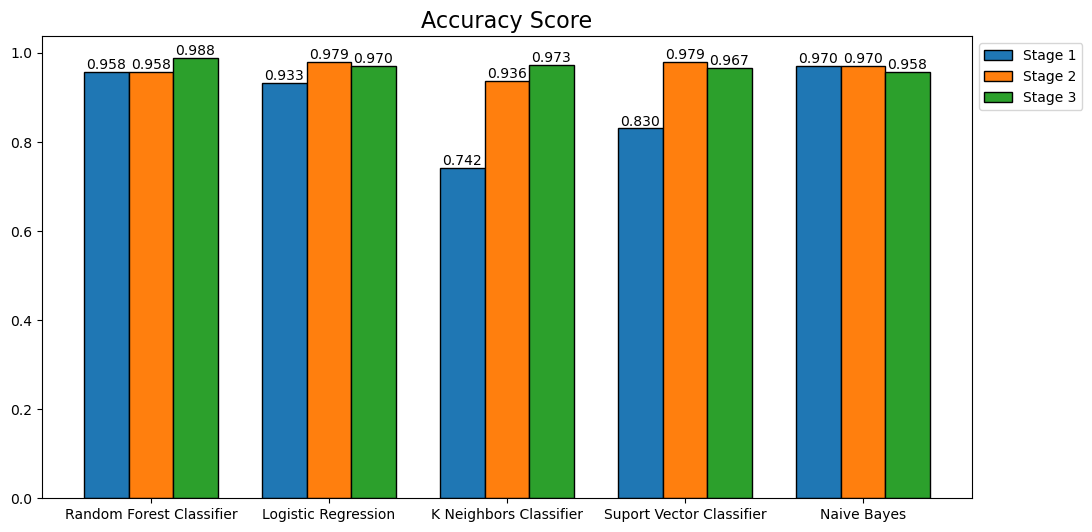

In [23]:
plt.figure(figsize=(12, 6))

barWidth = 0.25
bars1 = np.arange(5)
bars2 = [bar + barWidth for bar in bars1]
bars3 = [bar + barWidth for bar in bars2]

b1 = plt.bar(bars1, AS_Model.iloc[0,:5], width=barWidth, label=AS_Model.Stage[0], edgecolor='black')
b2 = plt.bar(bars2, AS_Model.iloc[1,:5], width=barWidth, label=AS_Model.Stage[1], edgecolor='black')
b3 = plt.bar(bars3, AS_Model.iloc[2,:5], width=barWidth, label=AS_Model.Stage[2], edgecolor='black')

plt.bar_label(b1, fmt="%.03f", color='black', fontsize = 10)
plt.bar_label(b2, fmt="%.03f", color='black', fontsize = 10)
plt.bar_label(b3, fmt="%.03f", color='black', fontsize = 10)
plt.title('Accuracy Score', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks = (bars1+bars2+bars3)/3,labels = Model, fontsize=10)


plt.show()

This model appears to have the same probability of a false positive and negative when the confusion matrix is observed. Perhaps a future improvement would be precisely to reduce the probability of a false negative, thought to be applied in the detection of cardiovascular diseases.


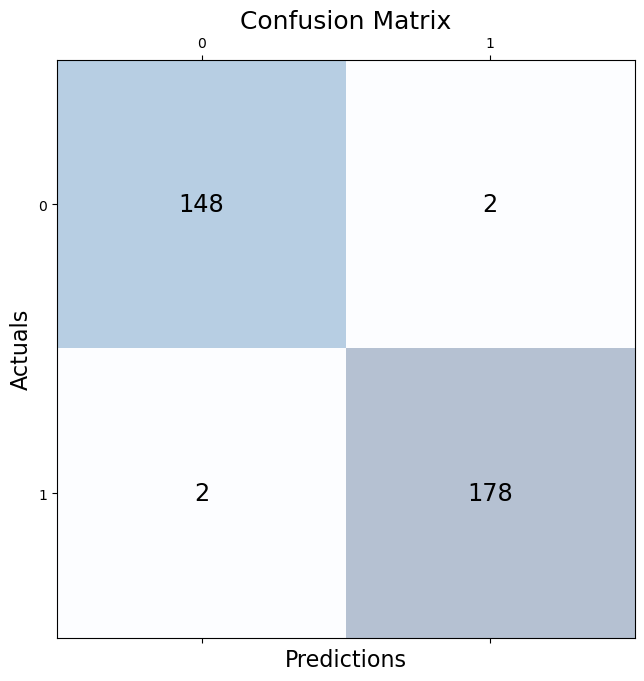

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_ac)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Finally, we arrived at the best machine learning model for detecting cardiovascular diseases and their hyperparameters

In [28]:
grid_search_ac.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 600}

In [32]:
best_clf = clf_best_ac
best_clf

RandomForestClassifier(max_depth=8, n_estimators=600, random_state=42)